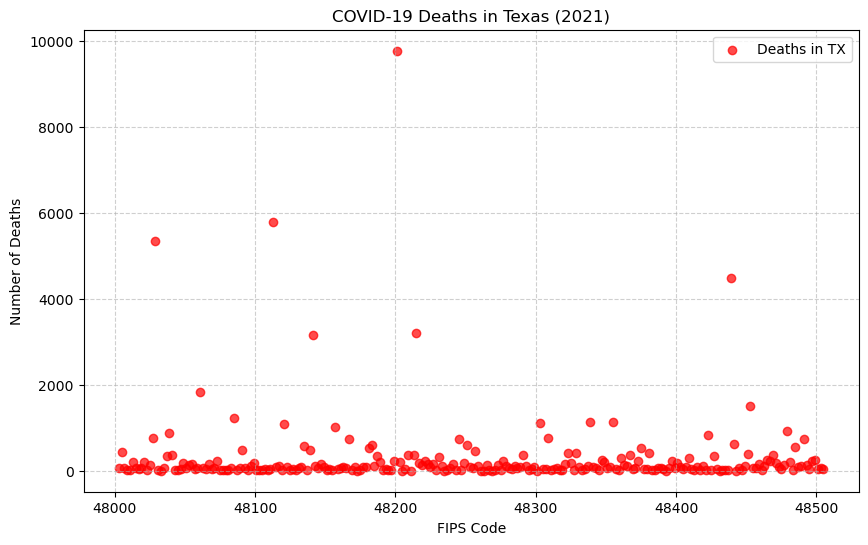

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV
cvsfileTX = 'TX_death2021_2.csv'
dataTX = np.genfromtxt(cvsfileTX, delimiter=',')

# Extract data columns
fips_TX = dataTX[:, 0]
death_TX = dataTX[:, 1]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(fips_TX, death_TX, c='red', marker='o', alpha=0.7, label='Deaths in TX')

# Customize the plot
plt.title('COVID-19 Deaths in Texas (2021)')
plt.xlabel('FIPS Code')
plt.ylabel('Number of Deaths')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Show the plot
plt.show()


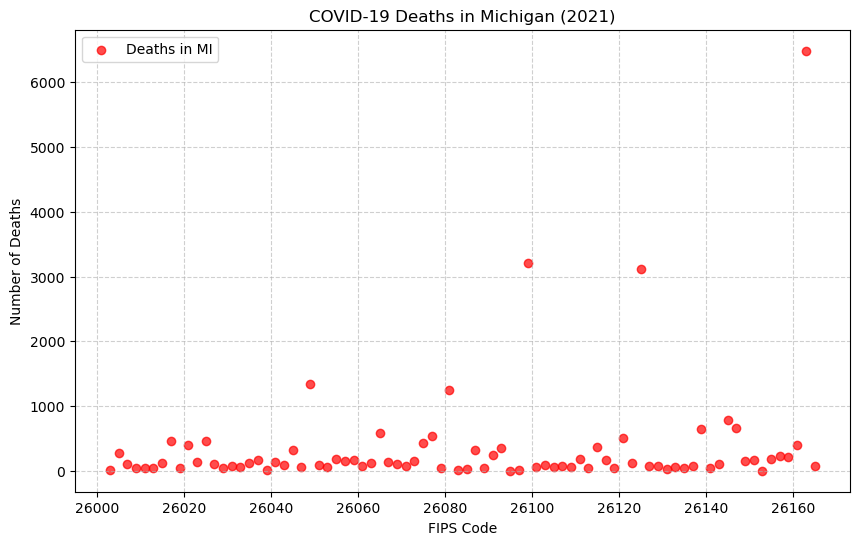

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV
cvsfileMI = 'MI_death2021.csv'
dataMI = np.genfromtxt(cvsfileMI, delimiter=',')

# Extract data columns
fips_MI = dataMI[:, 0]
death_MI = dataMI[:, 1]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(fips_MI, death_MI, c='red', marker='o', alpha=0.7, label='Deaths in MI')

# Customize the plot
plt.title('COVID-19 Deaths in Michigan (2021)')
plt.xlabel('FIPS Code')
plt.ylabel('Number of Deaths')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Show the plot
plt.show()


In [13]:
import numpy as np
from scipy.stats import mannwhitneyu

# Load data for Texas and Michigan
cvsfileTX = 'TX_death2021_2.csv'
dataTX = np.genfromtxt(cvsfileTX, delimiter=',')
fips_TX = dataTX[:, 0]
deaths_TX = dataTX[:, 1]

cvsfileMI = 'MI_death2021.csv'
dataMI = np.genfromtxt(cvsfileMI, delimiter=',')
fips_MI = dataMI[:, 0]
deaths_MI = dataMI[:, 1]

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(deaths_TX, deaths_MI, alternative='two-sided')

# Output the results
print(f"U statistic: {statistic}")
print(f"P-value: {p_value}")

# Make a decision based on the p-value and your chosen significance level
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in COVID-19 deaths between Texas and Michigan.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in COVID-19 deaths between Texas and Michigan.")


U statistic: 8311.0
P-value: 0.004382001319806288
Reject the null hypothesis: There is a significant difference in COVID-19 deaths between Texas and Michigan.


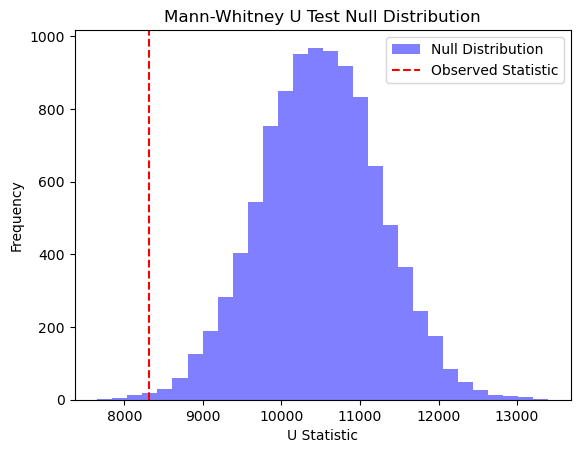

In [14]:
import numpy as np
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

# Load data for Texas and Michigan
cvsfileTX = 'TX_death2021_2.csv'
dataTX = np.genfromtxt(cvsfileTX, delimiter=',')
group_a = dataTX[:, 1]  # Assuming the first column indicates group membership (1 for Group A)

cvsfileMI = 'MI_death2021.csv'
dataMI = np.genfromtxt(cvsfileMI, delimiter=',')
group_b = dataMI[:, 1]  # Assuming 2 for Group B

# Observed Mann-Whitney U statistic
observed_statistic, _ = mannwhitneyu(group_a, group_b, alternative='two-sided')

# Number of permutations for the null distribution
num_permutations = 10000

# Initialize an array to store the U statistics from permutations
null_distribution = np.zeros(num_permutations)

# Permutation test
for i in range(num_permutations):
    # Concatenate the data from both groups
    combined_data = np.concatenate((group_a, group_b))
    
    # Shuffle the combined data
    np.random.shuffle(combined_data)
    
    # Recreate the shuffled groups
    permuted_group_a = combined_data[:len(group_a)]
    permuted_group_b = combined_data[len(group_a):]
    
    # Calculate the U statistic for the shuffled groups
    u_statistic, _ = mannwhitneyu(permuted_group_a, permuted_group_b, alternative='two-sided')
    
    # Store the U statistic in the null distribution
    null_distribution[i] = u_statistic

# Create a plot to visualize the null distribution
plt.figure()
plt.hist(null_distribution, bins=30, color='blue', alpha=0.5, label='Null Distribution')
plt.axvline(observed_statistic, color='red', linestyle='dashed', label='Observed Statistic')
plt.xlabel('U Statistic')
plt.ylabel('Frequency')
plt.legend(loc='best')
plt.title('Mann-Whitney U Test Null Distribution')
plt.show()


In [16]:
np.nanmean(dataTX[:, 1])


295.34387351778656

In [17]:
np.nanmean(dataMI[:, 1])


347.1807228915663